# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]
lat=[]
long=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
  
    cityname=city.city_name
    countryname=city.country_code

# If the city is unique, then add it to a our cities list
    if cityname not in cities:
        cities.append(cityname)
        countries.append(countryname)
        lat.append(lat_lng[0])
        long.append(lat_lng[1])


In [4]:
# len(latitude)
len(lat)

609

In [5]:
# len(cities)
len(cities)

609

In [6]:
# len(countries)
len(countries)

609

In [7]:
CityData_df=pd.DataFrame({"City": cities, "Country": countries, "Latitude":lat, "Longitude":long})
pd.options.display.float_format = "{:,.2f}".format
CityData_df

,City,Country,Latitude,Longitude
0,san carlos de bariloche,ar,-40.47,-69.58
1,ushuaia,ar,-76.56,-46.92
2,tarko-sale,ru,63.98,79.57
3,atuona,pf,-6.80,-133.10
4,pinotepa nacional,mx,14.28,-98.88
5,yellowknife,ca,79.87,-108.61
6,amderma,ru,76.30,59.23
7,itoman,jp,22.81,129.11
8,albany,au,-62.94,124.79
9,barabinsk,ru,55.25,78.34


In [8]:
CityData_df["Date"]=""
CityData_df["Cloudiness"]=""
CityData_df["Humidity"]=""
CityData_df["Max Temp"]=""
CityData_df["Wind Speed"]=""


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
setcounter=1
counter=0
restcounter=0

print("Beginning Data Retrieval")
print("-------------------------")

for index, row in CityData_df.iterrows():
    
    try:
        
        query = url+"&APPID="+api_key+"&q="+row["City"].replace(" ","+")+","+row["Country"]+"&units="+units
        resp = requests.get(query).json()
        
        Date = resp["dt"]
        Cloudiness = resp["clouds"]["all"]
        Humidity = resp["main"]["humidity"]
        MaxTemperature = resp["main"]["temp_max"]            
        WindSpeed = resp["wind"]["speed"]
            
        CityData_df.set_value(index,"Date",Date,takeable=False)
        CityData_df.set_value(index,"Cloudiness",Cloudiness,takeable=False)
        CityData_df.set_value(index,"Humidity",Humidity,takeable=False)
        CityData_df.set_value(index,"Max Temp",MaxTemperature,takeable=False)
        CityData_df.set_value(index,"Wind Speed",WindSpeed,takeable=False)
        
    except:
        
        print("City not found. Skipping...")
        
    restcounter=restcounter+1
    counter=counter+1

    if restcounter==50:
        time.sleep(5)
        setcounter=setcounter+1
        restcounter=0
        counter=1
        
    print("Processing Record "+str(counter)+" of set "+ str(setcounter)+ " | "+ row["City"])
#     mute the query to hide the APPID
#     print(query)

Beginning Data Retrieval
-------------------------


C:\Users\farai\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\farai\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\farai\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\farai\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\farai\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record 1 of set 1 | san carlos de bariloche
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | tarko-sale
Processing Record 4 of set 1 | atuona
City not found. Skipping...
Processing Record 5 of set 1 | pinotepa nacional
Processing Record 6 of set 1 | yellowknife
City not found. Skipping...
Processing Record 7 of set 1 | amderma
Processing Record 8 of set 1 | itoman
Processing Record 9 of set 1 | albany
Processing Record 10 of set 1 | barabinsk
City not found. Skipping...
Processing Record 11 of set 1 | bargal
Processing Record 12 of set 1 | portoferraio
Processing Record 13 of set 1 | cabo san lucas
Processing Record 14 of set 1 | cape town
Processing Record 15 of set 1 | roma
Processing Record 16 of set 1 | punta arenas
City not found. Skipping...
Processing Record 17 of set 1 | samalaeulu
Processing Record 18 of set 1 | jati
Processing Record 19 of set 1 | temryuk
Processing Record 20 of set 1 | ilulissat
Processing Record 21 of set 1 | qaanaaq
Processi

Processing Record 32 of set 4 | carnarvon
City not found. Skipping...
Processing Record 33 of set 4 | nizhneyansk
Processing Record 34 of set 4 | sovetskiy
Processing Record 35 of set 4 | victoria
City not found. Skipping...
Processing Record 36 of set 4 | gat
Processing Record 37 of set 4 | cayenne
Processing Record 38 of set 4 | tasiilaq
City not found. Skipping...
Processing Record 39 of set 4 | bengkulu
Processing Record 40 of set 4 | hasaki
Processing Record 41 of set 4 | avarua
Processing Record 42 of set 4 | klaksvik
Processing Record 43 of set 4 | klyuchi
Processing Record 44 of set 4 | moguer
Processing Record 45 of set 4 | pundaguitan
City not found. Skipping...
Processing Record 46 of set 4 | tsihombe
Processing Record 47 of set 4 | kargil
City not found. Skipping...
Processing Record 48 of set 4 | asau
Processing Record 49 of set 4 | caravelas
Processing Record 50 of set 4 | ribeira grande
Processing Record 1 of set 5 | longyearbyen
Processing Record 2 of set 5 | provideniy

Processing Record 13 of set 8 | camacha
Processing Record 14 of set 8 | vila franca do campo
City not found. Skipping...
Processing Record 15 of set 8 | chagda
Processing Record 16 of set 8 | ostrovnoy
Processing Record 17 of set 8 | mutis
Processing Record 18 of set 8 | thinadhoo
Processing Record 19 of set 8 | bud
City not found. Skipping...
Processing Record 20 of set 8 | ye
City not found. Skipping...
Processing Record 21 of set 8 | mocambique
Processing Record 22 of set 8 | challans
Processing Record 23 of set 8 | bitung
City not found. Skipping...
Processing Record 24 of set 8 | roberto payan
Processing Record 25 of set 8 | novokizhinginsk
Processing Record 26 of set 8 | ambon
Processing Record 27 of set 8 | tandil
Processing Record 28 of set 8 | hami
Processing Record 29 of set 8 | aketi
Processing Record 30 of set 8 | neuquen
City not found. Skipping...
Processing Record 31 of set 8 | katha
Processing Record 32 of set 8 | nsanje
Processing Record 33 of set 8 | adrar
Processing 

Processing Record 46 of set 11 | kurumkan
Processing Record 47 of set 11 | vardo
Processing Record 48 of set 11 | dolores
City not found. Skipping...
Processing Record 49 of set 11 | santarem
Processing Record 50 of set 11 | neryungri
Processing Record 1 of set 12 | handan
Processing Record 2 of set 12 | ginir
Processing Record 3 of set 12 | arica
City not found. Skipping...
Processing Record 4 of set 12 | karaton
Processing Record 5 of set 12 | trelew
Processing Record 6 of set 12 | chernyshevskiy
Processing Record 7 of set 12 | hovd
Processing Record 8 of set 12 | birjand
Processing Record 9 of set 12 | igrim
Processing Record 10 of set 12 | houston
Processing Record 11 of set 12 | pechenga
City not found. Skipping...
Processing Record 12 of set 12 | saint anthony
Processing Record 13 of set 12 | lillooet
Processing Record 14 of set 12 | xining
Processing Record 15 of set 12 | pisco
Processing Record 16 of set 12 | porto novo
Processing Record 17 of set 12 | edd
Processing Record 18 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
CityData_df.to_csv("CityData.csv")
CityData_df.head(3)

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,san carlos de bariloche,ar,-40.47,-69.58,1557302400,90,76,33.80,2.37
1,ushuaia,ar,-76.56,-46.92,1557302400,0,52,42.80,2.24
2,tarko-sale,ru,63.98,79.57,1557304322,84,64,34.27,15.75


In [24]:
CityData_df.count()

City          609
Country       609
Latitude      609
Longitude     609
Date          609
Cloudiness    609
Humidity      609
Max Temp      609
Wind Speed    609
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

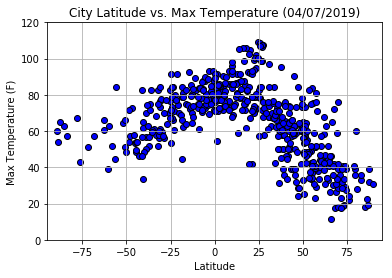

In [30]:
plt.scatter(pd.to_numeric(CityData_df["Latitude"]), pd.to_numeric(CityData_df["Max Temp"]),c="blue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (04/07/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(0, 120)
plt.xlim(-95, 95)
plt.grid()
plt.savefig("LatTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

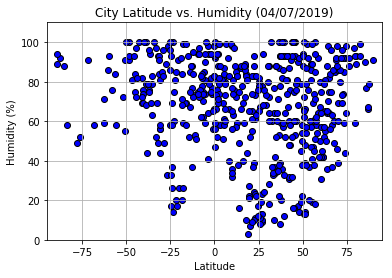

In [31]:
plt.scatter(pd.to_numeric(CityData_df["Latitude"]), pd.to_numeric(CityData_df["Humidity"]),c="blue", edgecolor="black")
plt.title("City Latitude vs. Humidity (04/07/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0, 110)
plt.xlim(-95, 95)
plt.grid()
plt.savefig("LatHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

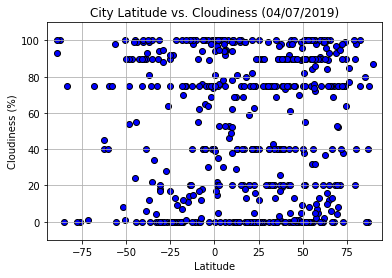

In [32]:
plt.scatter(pd.to_numeric(CityData_df["Latitude"]), pd.to_numeric(CityData_df["Cloudiness"]),c="blue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (04/07/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 110)
plt.xlim(-95, 95)
plt.grid()
plt.savefig("LatCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

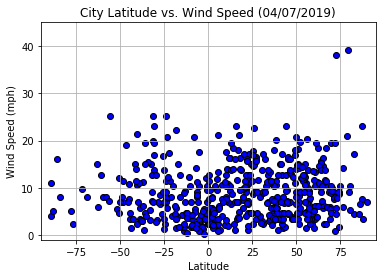

In [34]:
plt.scatter(pd.to_numeric(CityData_df["Latitude"]), pd.to_numeric(CityData_df["Wind Speed"]),c="blue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (04/07/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-1, 45)
plt.xlim(-95, 95)
plt.grid()
plt.savefig("LatWind.png")
plt.show()